### 装包

In [3]:
pip install gym

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827646 sha256=e5f03ee53382353797fcbdc9e038f984cefd1d51df95236e7fb1484f2328c4a0
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\b3\e5\d4\c8230c806aa3e259d427c5dce421c0e865993493c6dac4bd25
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pygame

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge box2d-py

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - box2d-py


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    box2d-py-2.3.8             |   py38h885f38d_5         448 KB  conda-forge
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-4.14.0               |   py38haa244fe_0         1.0 MB  conda-forge
    numpy-1.24.3               |   py38hf95b240_0          11 KB
    numpy-base-1.24.3          |   py38h005ec55_0         6.1 MB
    openssl-1.1.1l             |       h8ffe710_0         5.7 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                        


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py38_1
  - defaults/win-64::astropy==4.2.1=py38h2bbff1b_1
  - defaults/win-64::bkcharts==0.2=py38_0
  - defaults/win-64::bokeh==2.3.2=py38haa95532_0
  - defaults/win-64::bottleneck==1.3.2=py38h2a96729_1
  - defaults/noarch::dask==2021.4.0=pyhd3eb1b0_0
  - defaults/win-64::h5py==2.10.0=py38h5e291fa_0
  - defaults/win-64::imagecodecs==2021.3.31=py38h5da4933_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/win-64::matplotlib==3.3.4=py38haa95532_0
  - defaults/win-64::matplotlib-base==3.3.4=py38h49ac443_0
  - defaults/win-64::mkl_fft==1.3.0=py38h277e83a_2
  - defaults/win-64::mkl_random==1.2.1=py38hf11a4ad_2
  - defaults/win-64::numba==0.53.1=py38hf11a4ad_0
  - defaults/win-64::numexpr==2.7.3=py38hb80d3ca_1
  - defaults/win-64::numpy==1.20.1=py38h34a8a5c_0
  - defaults/win-64::pandas==1.2.4=py38hd77b12b_0
  - d

### 导包

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt

from IPython import display

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
from tqdm.notebook import tqdm

### 准备环境

In [2]:

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# 网上提到该设置可能有其他风险

In [3]:
#准备环境
seed = 543
def fix(env, seed):
    env.action_space.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
import gym
import random
env = gym.make('LunarLander-v2' ,render_mode='rgb_array')
fix(env, seed) # fix the environment Do not revise this !!!

下面是采用代码去输出 环境的 观测值，一个8维向量，动作是一个标量，4选一。

 - 该环境共有 8 个观测值，分别是： 水平坐标 x； 垂直坐标 y； 水平速度； 垂直速度； 角度； 角速度； 腿1触地； 腿2触地；
 - 可以采取四种离散的行动，分别是： 0 代表不采取任何行动 1.代表主引擎向左喷射 2 .代表主引擎向下喷射 3 .代表主引擎向右喷射
 - 环境中的 reward 大致是这样计算： 小艇坠毁得到 -100 分； 小艇在黄旗帜之间成功着地则得 100~140 分； 喷射主引擎（向下喷火）每次 -0.3 分； 小艇最终完全静止则再得 100 分

In [4]:
print(env.observation_space)

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)


In [5]:
print(env.action_space)

Discrete(4)


In [6]:
initial_state = env.reset()
print(initial_state)

(array([ 0.00629015,  1.3999223 ,  0.6371138 , -0.48880967, -0.00728197,
       -0.14431562,  0.        ,  0.        ], dtype=float32), {})


In [7]:
random_action = env.action_space.sample()
print(random_action)

3


### 随机动作玩5把

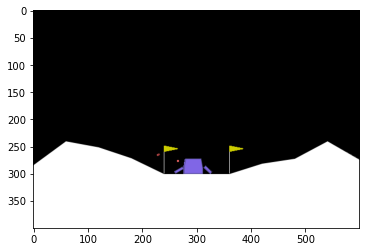

In [8]:
env.reset()

img = plt.imshow(env.render())

done = False
rewords = []
for i in range(5):
    env.reset()[0]
    img = plt.imshow(env.render())
    total_reward = 0
    done = False
    while not done:
        action = env.action_space.sample()
        observation, reward, done, _ , _= env.step(action)
        total_reward += reward
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
    rewords.append(total_reward)

In [9]:
rewords

[-200.08271333807346,
 -165.85066090041815,
 -209.26018892719014,
 -178.0866931381321,
 -73.61516505716682]

### 搭建PPO agent

In [10]:
class Memory:
    def __init__(self):
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.is_terminals = []

    def clear_memory(self):
        del self.actions[:]
        del self.states[:]
        del self.logprobs[:]
        del self.rewards[:]
        del self.is_terminals[:]

class ActorCriticDiscrete(nn.Module):
    def __init__(self, state_dim, action_dim, n_latent_var):
        super(ActorCriticDiscrete, self).__init__()

        # actor
        self.action_layer = nn.Sequential(
                nn.Linear(state_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, action_dim),
                nn.Softmax(dim=-1)
                )

        # critic
        self.value_layer = nn.Sequential(
               nn.Linear(state_dim, 128),
               nn.ReLU(),
               nn.Linear(128, 64),
               nn.ReLU(),
               nn.Linear(64, 1)
               )

    def act(self, state, memory):
        state = torch.from_numpy(state).float()
        action_probs = self.action_layer(state)
        dist = Categorical(action_probs)
        action = dist.sample()

        memory.states.append(state)
        memory.actions.append(action)
        memory.logprobs.append(dist.log_prob(action))

        return action.item()

    def evaluate(self, state, action):
        action_probs = self.action_layer(state)
        dist = Categorical(action_probs)

        action_logprobs = dist.log_prob(action)
        dist_entropy = dist.entropy()

        state_value = self.value_layer(state)

        return action_logprobs, torch.squeeze(state_value), dist_entropy

class PPOAgent:
    def __init__(self, state_dim, action_dim, n_latent_var, lr, betas, gamma, K_epochs, eps_clip):
        self.lr = lr
        self.betas = betas
        self.gamma = gamma
        self.eps_clip = eps_clip
        self.K_epochs = K_epochs
        self.timestep = 0
        self.memory = Memory()

        self.policy = ActorCriticDiscrete(state_dim, action_dim, n_latent_var)
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr, betas=betas)
        self.policy_old = ActorCriticDiscrete(state_dim, action_dim, n_latent_var)
        self.policy_old.load_state_dict(self.policy.state_dict())

        self.MseLoss = nn.MSELoss()

    def update(self):   
        # Monte Carlo estimate of state rewards:
        rewards = []
        discounted_reward = 0
        for reward, is_terminal in zip(reversed(self.memory.rewards), reversed(self.memory.is_terminals)):
            if is_terminal:
                discounted_reward = 0
            discounted_reward = reward + (self.gamma * discounted_reward)
            rewards.insert(0, discounted_reward)

        # Normalizing the rewards:
        rewards = torch.tensor(rewards, dtype=torch.float32)
        rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-5)

        # convert list to tensor
        old_states = torch.stack(self.memory.states).detach()
        old_actions = torch.stack(self.memory.actions).detach()
        old_logprobs = torch.stack(self.memory.logprobs).detach()

        # Optimize policy for K epochs:
        for _ in range(self.K_epochs):
            # Evaluating old actions and values : 新策略 重用 旧样本进行训练 
            logprobs, state_values, dist_entropy = self.policy.evaluate(old_states, old_actions)

            # Finding the ratio (pi_theta / pi_theta__old): 
            ratios = torch.exp(logprobs - old_logprobs.detach())

            # Finding Surrogate Loss:计算优势值
            advantages = rewards - state_values.detach()
            surr1 = ratios * advantages ###  重要性采样的思想，确保新的策略函数和旧策略函数的分布差异不大
            surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages ### 采样clip的方式过滤掉一些新旧策略相差较大的样本
            loss = -torch.min(surr1, surr2)  + 0.5*self.MseLoss(state_values, rewards) - 0.01*dist_entropy

            # take gradient step
            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()

        # Copy new weights into old policy:
        self.policy_old.load_state_dict(self.policy.state_dict())

    def step(self, reward, done):
        self.timestep += 1 
        # Saving reward and is_terminal:
        self.memory.rewards.append(reward)
        self.memory.is_terminals.append(done)

        # update if its time
        if self.timestep % update_timestep == 0:
            self.update()
            self.memory.clear_memory()
            self.timstamp = 0

    def act(self, state):
        return self.policy_old.act(state, self.memory)

### 训练PPO agent

In [11]:

state_dim = 8 ### 游戏的状态是个8维向量
action_dim = 4 ### 游戏的输出有4个取值
n_latent_var = 256           # 神经元个数
update_timestep = 1200      # 每多少补跟新策略
lr = 0.002                  # learning rate
betas = (0.9, 0.999)
gamma = 0.99                # discount factor
K_epochs = 4                # update policy for K epochs
eps_clip = 0.2              # clip parameter for PPO  论文中表明0.2效果不错
random_seed = 1 

agent = PPOAgent(state_dim ,action_dim,n_latent_var,lr,betas,gamma,K_epochs,eps_clip)
# agent.network.train()  # Switch network into training mode 
EPISODE_PER_BATCH = 5  # update the  agent every 5 episode
NUM_BATCH = 300     # totally update the agent for 300 time


avg_total_rewards, avg_final_rewards = [], []

# prg_bar = tqdm(range(NUM_BATCH))
for i in range(NUM_BATCH):

    log_probs, rewards = [], []
    total_rewards, final_rewards = [], []
    values    = []
    masks     = []
    entropy = 0
    # collect trajectory
    for episode in range(EPISODE_PER_BATCH):
        ### 重开一把游戏
        state = env.reset()[0]
        total_reward, total_step = 0, 0
        seq_rewards = []
        for i in range(1000):  ###游戏未结束

            action = agent.act(state) ### 按照策略网络输出的概率随机采样一个动作
            next_state, reward, done, _, _ = env.step(action) ### 与环境state进行交互，输出reward 和 环境next_state
            state = next_state
            total_reward += reward
            total_step += 1     
            rewards.append(reward) ### 记录每一个动作的reward
            agent.step(reward, done)   
            if done:  ###游戏结束
                final_rewards.append(reward)
                total_rewards.append(total_reward)
                break

    print(f"rewards looks like ", np.shape(rewards))  
    if len(final_rewards)> 0 and len(total_rewards) > 0:
        avg_total_reward = sum(total_rewards) / len(total_rewards)
        avg_final_reward = sum(final_rewards) / len(final_rewards)
        avg_total_rewards.append(avg_total_reward)
        avg_final_rewards.append(avg_final_reward)

rewards looks like  (409,)
rewards looks like  (397,)
rewards looks like  (373,)
rewards looks like  (434,)
rewards looks like  (386,)
rewards looks like  (469,)
rewards looks like  (451,)
rewards looks like  (471,)
rewards looks like  (429,)
rewards looks like  (413,)
rewards looks like  (407,)
rewards looks like  (567,)
rewards looks like  (404,)
rewards looks like  (461,)
rewards looks like  (472,)
rewards looks like  (467,)
rewards looks like  (542,)
rewards looks like  (490,)
rewards looks like  (469,)
rewards looks like  (469,)
rewards looks like  (436,)
rewards looks like  (577,)
rewards looks like  (726,)
rewards looks like  (537,)
rewards looks like  (501,)
rewards looks like  (541,)
rewards looks like  (563,)
rewards looks like  (458,)
rewards looks like  (557,)
rewards looks like  (548,)
rewards looks like  (540,)
rewards looks like  (454,)
rewards looks like  (479,)
rewards looks like  (497,)
rewards looks like  (476,)
rewards looks like  (428,)
rewards looks like  (447,)
r

rewards looks like  (1063,)
rewards looks like  (1262,)
rewards looks like  (1375,)
rewards looks like  (1491,)


### PPO agent在玩5把游戏

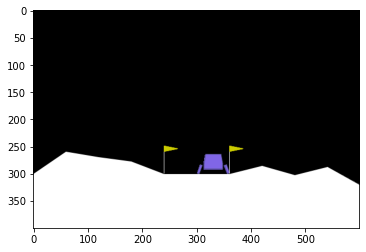

In [14]:

fix(env, seed)
agent.policy.eval() # set the network into evaluation mode
test_total_reward = []
for i in range(5):
    actions = []
    state = env.reset()[0]
    img = plt.imshow(env.render())
    total_reward = 0
    done = False
    while not done :
        action= agent.act(state)
        actions.append(action)
        state, reward, done, _, _ = env.step(action)
        total_reward += reward
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
    test_total_reward.append(total_reward)

In [15]:
test_total_reward

[14.001243596218075,
 288.80299821616137,
 229.40816702966168,
 -90.39667459390566,
 310.07656187403023]